In [1]:
# import libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [2]:
# read data into dataframe
with open('dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
# Data has 7676 columns in total
data.head()

,ID,Time,Group,GR1,GR2,GR3,GR4,GR5,GR6,GR7,...,M6,M7,M8,M9,M10,M11,M12,FA1,FA2,Class
0,0,20210901T052203,1,88.0,4000.0,0.788286,0.858421,0.000000,0.000000,0.808354,...,0.770476,3.0,2036.0,-0.128886,0.687892,0.169358,0.857251,0.045817,2.484042,CL146
1,1,20210901T052203,1,177.0,4000.0,0.842848,1.676998,2.689012,2.689012,0.817277,...,80.452591,666.0,2552.0,1.149273,14.546570,13.930302,28.476871,0.101117,3.193393,CL6
2,2,20210901T052203,1,209.0,4000.0,0.986631,1.118038,0.000000,0.000000,0.798937,...,190.957947,103.0,213.0,-5.968551,154.971451,184.861984,339.833435,0.085103,8.746268,CL6
3,3,20210901T052203,1,471.0,4000.0,0.986631,1.000529,0.000000,0.000000,0.826357,...,0.464587,16.0,2576.0,4.431015,6.842685,5.425236,12.267921,0.137593,9.402219,CL187
4,4,20210901T052203,1,363.0,4000.0,0.994236,1.011487,0.000000,2.805979,0.797859,...,192.430420,86.0,131.0,18.884167,273.286896,281.943420,555.230286,0.108135,6.391616,CL6


In [4]:
# Data has 34553 samples in total
len(data)

34553

# Data Preprocessing

## Dealing with missing data

In [5]:
# remove first three columns
data = data.iloc[:,3:]
# remove rows with number of missing values > 50%. Number of removed rows is 0.
data = data[data.isnull().sum(axis=1) < 3837]

In [6]:
# Separate X and y
X = data.iloc[:,:-1]
y = data.iloc[:,-1].values
# Check data type of features. All are numeric variables.
X.select_dtypes(exclude=np.number).head()

""
0
1
2
3
4


In [7]:
from collections import Counter
Counter(y)

Counter({'CL146': 4120,
         'CL6': 21844,
         'CL187': 483,
         'CL36': 262,
         'CL376': 1842,
         'CL200': 309,
         'CL168': 593,
         'CL2': 903,
         'CL1': 275,
         'CL5': 181,
         'CL8612': 492,
         'CL208': 311,
         'CL29': 646,
         'CL327': 205,
         'CL8': 11,
         'CL4': 219,
         'CL153': 125,
         'CL95': 186,
         'CL167': 41,
         'CL112': 66,
         'CL12': 281,
         'CL9': 217,
         'CL37': 209,
         'CL244': 243,
         'CL233': 23,
         'CL147': 45,
         'CL266': 51,
         'CL94': 157,
         'CL7': 212,
         'CL92': 1})

In [8]:
# remove columns with number of missing values > 50%
X = X[X.columns[X.isnull().sum() < 17277]]

In [9]:
# X has 7484 features for now
X.head()

,GR1,GR2,GR3,GR4,GR5,GR6,GR7,GR8,GR9,GR10,...,M5,M6,M7,M8,M9,M10,M11,M12,FA1,FA2
0,88.0,4000.0,0.788286,0.858421,0.000000,0.000000,0.808354,0.808401,0.010337,0.010377,...,0.139255,0.770476,3.0,2036.0,-0.128886,0.687892,0.169358,0.857251,0.045817,2.484042
1,177.0,4000.0,0.842848,1.676998,2.689012,2.689012,0.817277,0.839456,0.016430,0.016606,...,31.988707,80.452591,666.0,2552.0,1.149273,14.546570,13.930302,28.476871,0.101117,3.193393
2,209.0,4000.0,0.986631,1.118038,0.000000,0.000000,0.798937,0.801879,0.010544,0.010625,...,97.268913,190.957947,103.0,213.0,-5.968551,154.971451,184.861984,339.833435,0.085103,8.746268
3,471.0,4000.0,0.986631,1.000529,0.000000,0.000000,0.826357,0.836645,0.014480,0.014515,...,0.369776,0.464587,16.0,2576.0,4.431015,6.842685,5.425236,12.267921,0.137593,9.402219
4,363.0,4000.0,0.994236,1.011487,0.000000,2.805979,0.797859,0.811558,0.010298,0.010537,...,154.239075,192.430420,86.0,131.0,18.884167,273.286896,281.943420,555.230286,0.108135,6.391616


In [10]:
# There are 26243 out of 34553 rows contain missing values after roughly filtering out missing values
missrow = X.isnull().sum(axis=1)
missrow = missrow[missrow != 0]
len(missrow)

26243

## Split training and test data

In [11]:
column_name = X.columns
X = X.values

In [12]:
# Split 80% samples as training data and the rest 20% as test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Replace missing data in each column with the mean value in the training dataset in that column 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

## Data normalization

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Feature Selection

In [15]:
# 7394 out of 7484 features are left after removing features with 0 variances.
X_train = pd.DataFrame(data=X_train,columns=column_name)
X_test = pd.DataFrame(data=X_test,columns=column_name)
filter_name = X_train.var()[X_train.var() > 0].index
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold()
sel.fit_transform(X_train.values)
X_train = sel.transform(X_train.values)
X_test = sel.transform(X_test.values)
X_train = pd.DataFrame(data=X_train,columns=filter_name)
X_test = pd.DataFrame(data=X_test,columns=filter_name)

In [16]:
X_train.head()

,GR1,GR3,GR4,GR5,GR6,GR7,GR8,GR9,GR10,GR11,...,M5,M6,M7,M8,M9,M10,M11,M12,FA1,FA2
0,0.103555,-1.650776,-2.070533,-0.336799,-0.426226,-5.236764,-6.536165,-0.333118,-0.336289,-2.810706,...,-0.724895,-0.727857,-0.792277,8.504634,-0.002797,-0.717904,-0.712531,-0.725839,1.319600,-1.102920
1,0.284808,-0.593807,-0.816753,-0.336799,0.110718,0.210166,0.252335,-0.227123,-0.235716,-0.909826,...,-0.635380,-0.622713,-0.391929,0.054001,-0.002642,-0.700824,-0.694957,-0.708256,-0.488553,0.881691
2,-0.719053,0.019380,0.539628,-0.336799,0.126284,0.402640,0.344127,-0.246993,-0.254542,-1.036959,...,-0.175932,-0.041635,0.173780,-0.325247,-0.248619,-0.266106,-0.266202,-0.270098,-0.700317,0.873965
3,0.223460,-1.218444,-1.124347,0.093440,-0.057886,-0.199482,0.118980,-0.224714,-0.234252,0.091828,...,-0.735528,-0.742277,-0.774871,-0.276019,-0.006569,-0.714398,-0.712296,-0.723927,-0.624277,1.437723
4,-0.097217,0.993065,0.882016,0.210805,0.108960,0.552694,0.455365,-0.208740,-0.218116,0.513834,...,2.310074,1.793949,3.524522,-0.271049,0.022872,-0.526684,-0.541303,-0.541850,0.411736,0.087108


In [17]:
# Use Univariate feature selection method and remove features with p-value >0.01. 7308 features left
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=7316)
selector.fit(X_train.values, y_train)
scores = selector.pvalues_
X_train = selector.transform(X_train.values)
X_test = selector.transform(X_test.values)
filter_name = filter_name[scores<=0.05]
X_train = pd.DataFrame(data=X_train,columns=filter_name)
X_test = pd.DataFrame(data=X_test,columns=filter_name)

In [18]:
(scores<=0.05).sum()

7316

In [19]:
X_train.head()

,GR1,GR3,GR4,GR5,GR6,GR7,GR8,GR9,GR10,GR11,...,M4,M5,M6,M7,M8,M10,M11,M12,FA1,FA2
0,0.103555,-1.650776,-2.070533,-0.336799,-0.426226,-5.236764,-6.536165,-0.333118,-0.336289,-2.810706,...,-0.696176,-0.724895,-0.727857,-0.792277,8.504634,-0.717904,-0.712531,-0.725839,1.319600,-1.102920
1,0.284808,-0.593807,-0.816753,-0.336799,0.110718,0.210166,0.252335,-0.227123,-0.235716,-0.909826,...,-0.579763,-0.635380,-0.622713,-0.391929,0.054001,-0.700824,-0.694957,-0.708256,-0.488553,0.881691
2,-0.719053,0.019380,0.539628,-0.336799,0.126284,0.402640,0.344127,-0.246993,-0.254542,-1.036959,...,0.100336,-0.175932,-0.041635,0.173780,-0.325247,-0.266106,-0.266202,-0.270098,-0.700317,0.873965
3,0.223460,-1.218444,-1.124347,0.093440,-0.057886,-0.199482,0.118980,-0.224714,-0.234252,0.091828,...,-0.713854,-0.735528,-0.742277,-0.774871,-0.276019,-0.714398,-0.712296,-0.723927,-0.624277,1.437723
4,-0.097217,0.993065,0.882016,0.210805,0.108960,0.552694,0.455365,-0.208740,-0.218116,0.513834,...,1.170280,2.310074,1.793949,3.524522,-0.271049,-0.526684,-0.541303,-0.541850,0.411736,0.087108


## Dimension reduction

In [20]:
# Do dimension reduction by PCA and keep n_components explaining >95% variance
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85,svd_solver="full")
pca.fit(X_train.values)
X_train = pca.transform(X_train.values)
X_test = pca.transform(X_test.values)
print(pca.explained_variance_ratio_)

[0.14036058 0.11584552 0.07151021 0.05470373 0.04127982 0.02829103
 0.02027382 0.01730074 0.01496052 0.01296736 0.01254053 0.0107479
 0.01054404 0.00853495 0.00819693 0.00812521 0.00733141 0.00695643
 0.00689608 0.00628261 0.0057903  0.00559843 0.00547166 0.00495213
 0.00492569 0.00468222 0.00461941 0.00406534 0.00385918 0.00381083
 0.00372741 0.00353036 0.00341558 0.00332571 0.00324763 0.00312451
 0.00302372 0.00295973 0.00289005 0.00278547 0.00277333 0.00271686
 0.00262717 0.00258673 0.00254325 0.00250123 0.00244462 0.00236617
 0.00233888 0.00231101 0.00226635 0.00222227 0.00214529 0.00210911
 0.00205296 0.00203437 0.00196171 0.00195255 0.00193625 0.0018535
 0.00182919 0.00180712 0.00175178 0.00173193 0.00170044 0.00164666
 0.00161818 0.00160823 0.00159726 0.00157283 0.00154816 0.00152319
 0.00148978 0.00147523 0.00144593 0.00142283 0.0013989  0.00138277
 0.00134819 0.0013424  0.00132916 0.00130244 0.0012859  0.00126498
 0.00125187 0.00123971 0.00122182 0.00120976 0.00119039 0.001168

In [21]:
len(pca.explained_variance_ratio_)

195

# Data training

## Logistic Regression

In [45]:
# use 5-fold CV pick best C = 0.003
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.array([0.001,0.003,0.01,0.03,0.1])}
classifier = LogisticRegression(random_state=42)
lr_gscv = GridSearchCV(classifier, param_grid, cv=5)
lr_gscv.fit(X_train, y_train)

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([0.001, 0.003, 0.01 , 0.03 , 0.1  ])})

In [46]:
lr_gscv.best_params_

{'C': 0.003}

In [47]:
y_pred = lr_gscv.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
accuracy_score(y_test,y_pred)

0.9357545941253075

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         CL1       0.83      0.86      0.85        58
       CL112       0.67      0.46      0.55        13
        CL12       0.61      0.38      0.47        58
       CL146       0.93      0.98      0.95       790
       CL147       0.00      0.00      0.00         9
       CL153       0.66      0.58      0.61        33
       CL167       1.00      0.25      0.40        12
       CL168       0.95      0.95      0.95       130
       CL187       0.59      0.67      0.63        73
         CL2       0.86      0.80      0.83       171
       CL200       0.68      0.82      0.75        57
       CL208       0.98      0.85      0.91        53
       CL233       0.00      0.00      0.00         7
       CL244       0.63      0.63      0.63        43
       CL266       1.00      0.44      0.62         9
        CL29       0.78      0.85      0.82       127
       CL327       0.82      0.72      0.77        43
        CL36       0.86    

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

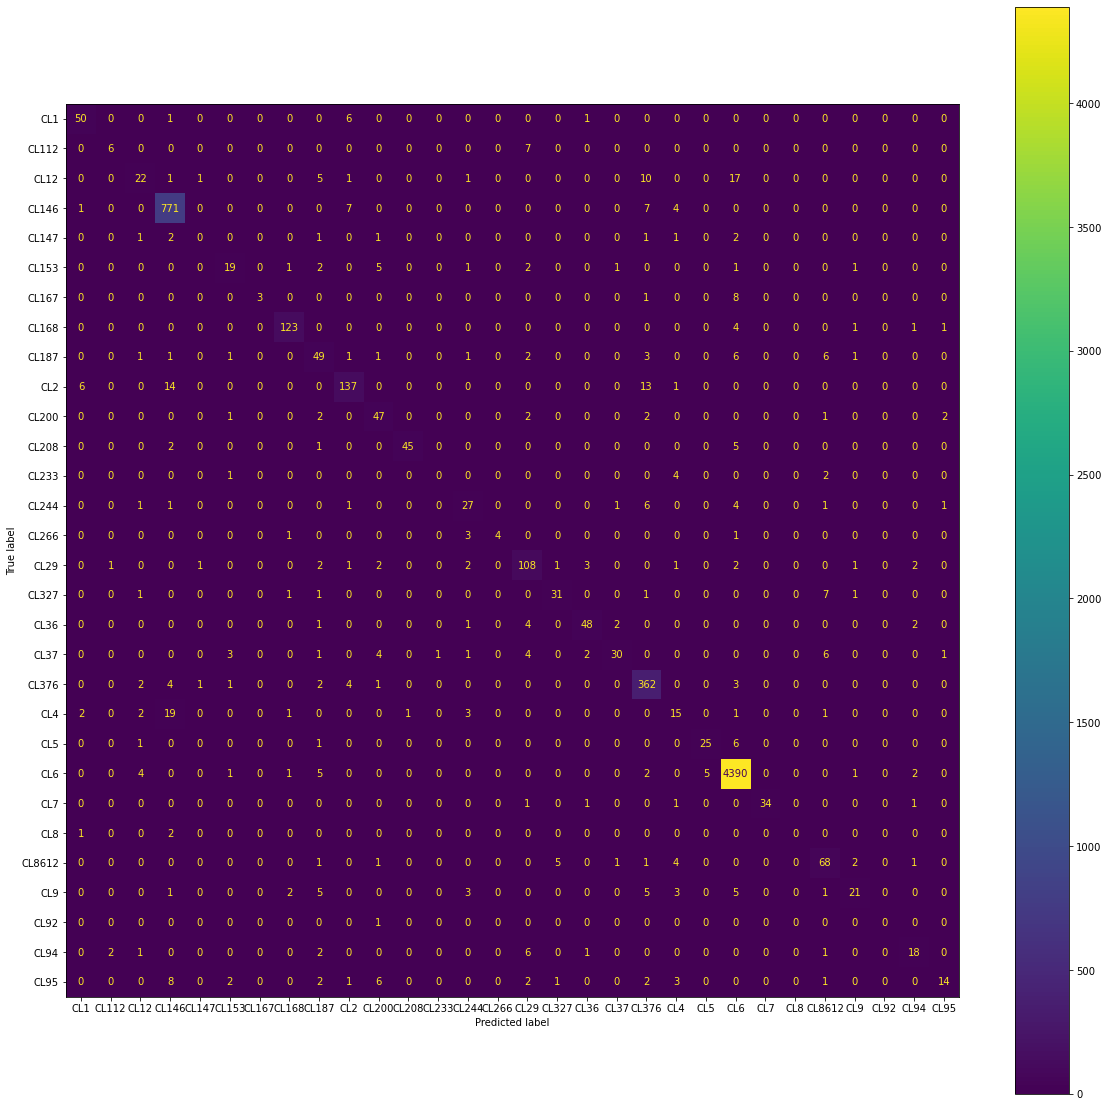

In [50]:
fig, ax = plt.subplots(figsize=(20, 20))
ConfusionMatrixDisplay.from_estimator(lr_gscv, X_test, y_test,ax=ax)
plt.show()

In [51]:
y_pred_train = lr_gscv.predict(X_train)
accuracy_score(y_train,y_pred_train)

0.957600752478113

In [52]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         CL1       0.98      0.95      0.97       217
       CL112       0.91      0.79      0.85        53
        CL12       0.72      0.52      0.60       223
       CL146       0.95      0.98      0.96      3330
       CL147       0.69      0.25      0.37        36
       CL153       0.76      0.61      0.67        92
       CL167       1.00      0.24      0.39        29
       CL168       0.99      0.97      0.98       463
       CL187       0.74      0.64      0.68       410
         CL2       0.92      0.85      0.88       732
       CL200       0.79      0.80      0.79       252
       CL208       0.95      0.90      0.92       258
       CL233       1.00      0.44      0.61        16
       CL244       0.85      0.77      0.81       200
       CL266       0.83      0.60      0.69        42
        CL29       0.90      0.92      0.91       519
       CL327       0.92      0.84      0.88       162
        CL36       0.97    

## Weighted LR

In [55]:
param_grid = {'C': np.array([0.01,0.03,0.1,0.3,1,3,10])}
classifier = LogisticRegression(random_state=42,class_weight='balanced')
lr_gscv = GridSearchCV(classifier, param_grid, cv=5)
lr_gscv.fit(X_train, y_train)

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             param_grid={'C': array([ 0.01,  0.03,  0.1 ,  0.3 ,  1.  ,  3.  , 10.  ])})

In [56]:
lr_gscv.best_params_

{'C': 3.0}

In [57]:
y_pred = lr_gscv.predict(X_test)
accuracy_score(y_test,y_pred)

0.8865576616987412

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         CL1       0.75      0.84      0.80        58
       CL112       0.35      0.54      0.42        13
        CL12       0.32      0.62      0.42        58
       CL146       0.96      0.87      0.92       790
       CL147       0.03      0.11      0.05         9
       CL153       0.47      0.48      0.48        33
       CL167       0.17      0.42      0.24        12
       CL168       0.91      0.93      0.92       130
       CL187       0.38      0.66      0.48        73
         CL2       0.71      0.78      0.74       171
       CL200       0.59      0.82      0.69        57
       CL208       0.64      0.89      0.74        53
       CL233       0.00      0.00      0.00         7
       CL244       0.47      0.67      0.55        43
       CL266       0.29      0.56      0.38         9
        CL29       0.74      0.77      0.76       127
       CL327       0.74      0.65      0.69        43
        CL36       0.77    

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

## K-nearest neighbors

In [59]:
# use 5-fold CV to pick the best K=5
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,25)}
knn_gscv = GridSearchCV(classifier, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [60]:
knn_gscv.best_params_

{'n_neighbors': 5}

In [61]:
y_pred = knn_gscv.predict(X_test)
accuracy_score(y_test,y_pred)

0.8988568948053828

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         CL1       0.94      0.81      0.87        58
       CL112       0.67      0.31      0.42        13
        CL12       0.42      0.28      0.33        58
       CL146       0.80      0.97      0.88       790
       CL147       0.00      0.00      0.00         9
       CL153       0.42      0.39      0.41        33
       CL167       0.50      0.17      0.25        12
       CL168       0.92      0.94      0.93       130
       CL187       0.38      0.32      0.35        73
         CL2       0.77      0.51      0.61       171
       CL200       0.57      0.54      0.56        57
       CL208       0.75      0.75      0.75        53
       CL233       0.00      0.00      0.00         7
       CL244       0.57      0.47      0.51        43
       CL266       0.75      0.33      0.46         9
        CL29       0.70      0.69      0.70       127
       CL327       0.82      0.74      0.78        43
        CL36       0.82    

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

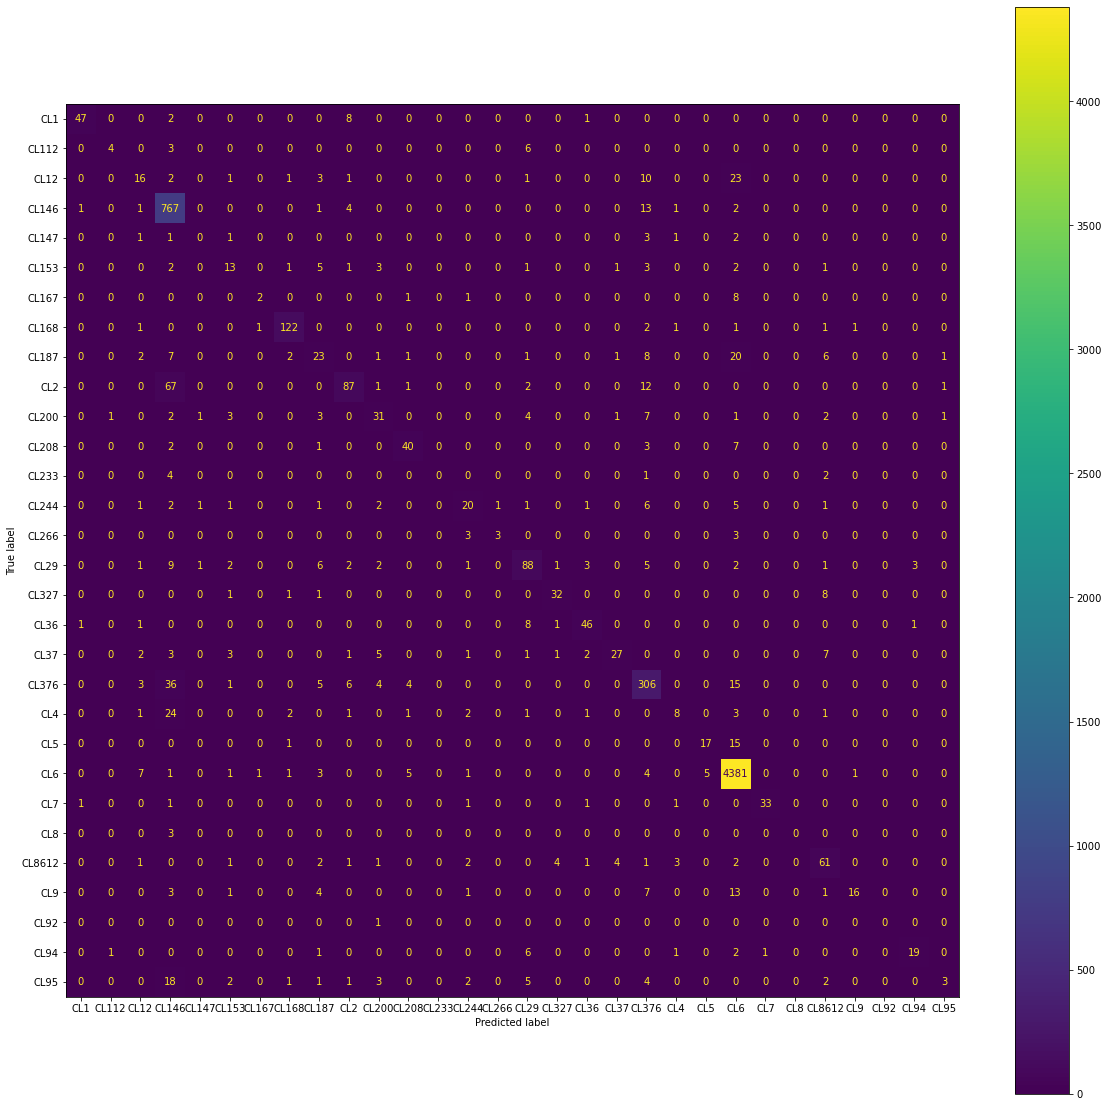

In [64]:
fig, ax = plt.subplots(figsize=(20, 20))
ConfusionMatrixDisplay.from_estimator(knn_gscv, X_test, y_test,ax=ax)
plt.show()

In [65]:
y_pred_train = knn_gscv.predict(X_train)
accuracy_score(y_train,y_pred_train)

0.9228709934158165

In [66]:
print(classification_report(y_train,y_pred_train))

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         CL1       0.89      0.80      0.84       217
       CL112       0.88      0.40      0.55        53
        CL12       0.62      0.51      0.56       223
       CL146       0.84      0.99      0.91      3330
       CL147       0.33      0.11      0.17        36
       CL153       0.49      0.58      0.53        92
       CL167       0.20      0.10      0.14        29
       CL168       0.89      0.97      0.93       463
       CL187       0.64      0.47      0.54       410
         CL2       0.89      0.62      0.73       732
       CL200       0.72      0.62      0.67       252
       CL208       0.85      0.84      0.84       258
       CL233       0.80      0.25      0.38        16
       CL244       0.78      0.62      0.69       200
       CL266       0.72      0.43      0.54        42
        CL29       0.82      0.78      0.80       519
       CL327       0.79      0.75      0.77       162
        CL36       0.86    

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## weighted KNN

In [67]:
classifier = KNeighborsClassifier(weights='distance')
param_grid = {'n_neighbors': np.arange(1,25)}
knn_gscv = GridSearchCV(classifier, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [68]:
knn_gscv.best_params_

{'n_neighbors': 4}

In [69]:
y_pred = knn_gscv.predict(X_test)
accuracy_score(y_test,y_pred)

0.9004485602662422

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         CL1       0.96      0.78      0.86        58
       CL112       1.00      0.23      0.38        13
        CL12       0.57      0.34      0.43        58
       CL146       0.82      0.96      0.88       790
       CL147       0.00      0.00      0.00         9
       CL153       0.43      0.30      0.36        33
       CL167       0.40      0.17      0.24        12
       CL168       0.94      0.90      0.92       130
       CL187       0.31      0.25      0.27        73
         CL2       0.78      0.54      0.64       171
       CL200       0.54      0.54      0.54        57
       CL208       0.82      0.77      0.80        53
       CL233       1.00      0.14      0.25         7
       CL244       0.58      0.51      0.54        43
       CL266       0.67      0.44      0.53         9
        CL29       0.70      0.71      0.71       127
       CL327       0.82      0.77      0.80        43
        CL36       0.82    

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

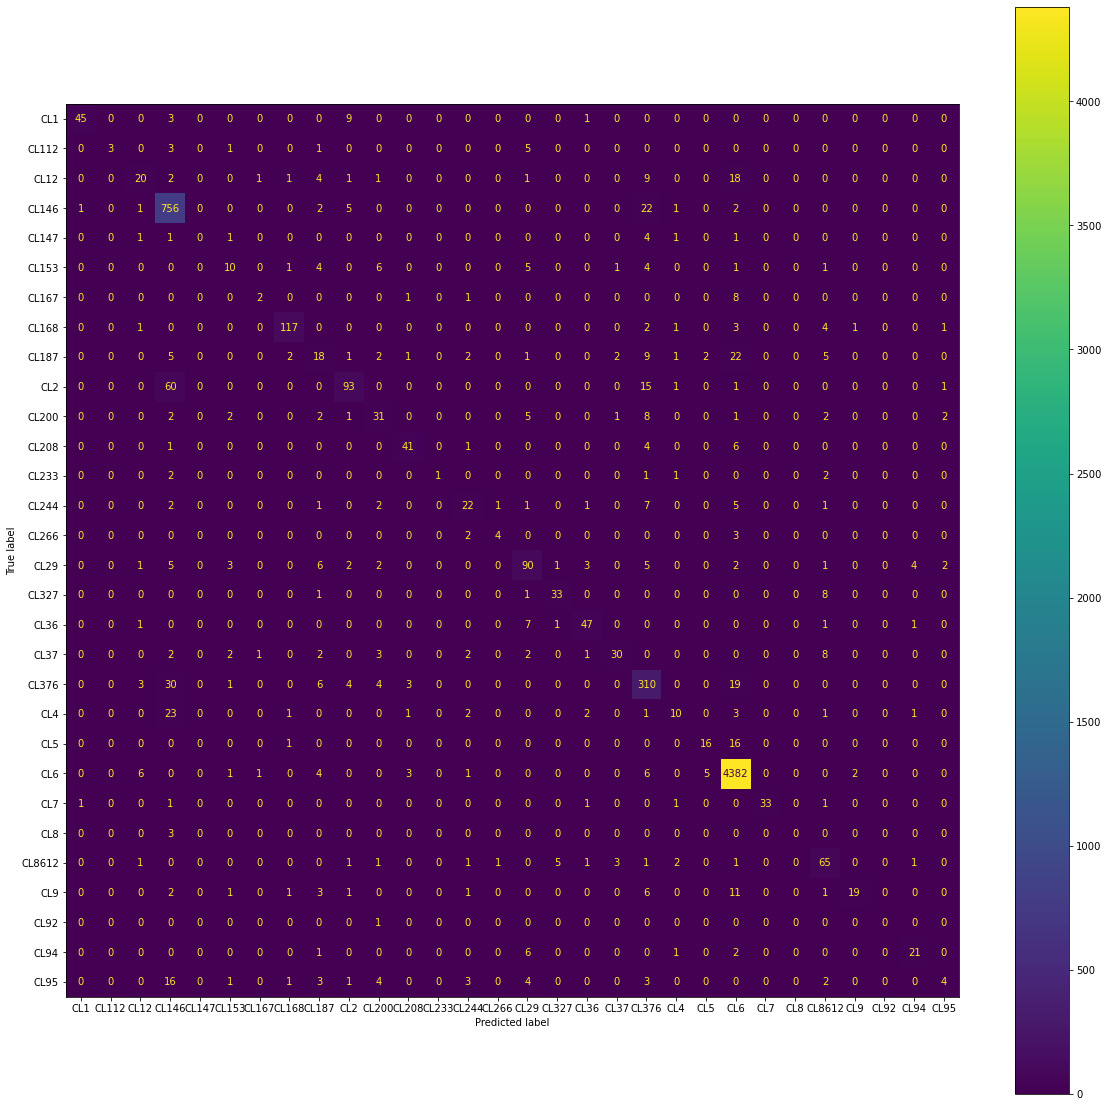

In [71]:
fig, ax = plt.subplots(figsize=(20, 20))
ConfusionMatrixDisplay.from_estimator(knn_gscv, X_test, y_test,ax=ax)
plt.show()

In [72]:
y_pred_train = knn_gscv.predict(X_train)
accuracy_score(y_train,y_pred_train)

1.0

In [73]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         CL1       1.00      1.00      1.00       217
       CL112       1.00      1.00      1.00        53
        CL12       1.00      1.00      1.00       223
       CL146       1.00      1.00      1.00      3330
       CL147       1.00      1.00      1.00        36
       CL153       1.00      1.00      1.00        92
       CL167       1.00      1.00      1.00        29
       CL168       1.00      1.00      1.00       463
       CL187       1.00      1.00      1.00       410
         CL2       1.00      1.00      1.00       732
       CL200       1.00      1.00      1.00       252
       CL208       1.00      1.00      1.00       258
       CL233       1.00      1.00      1.00        16
       CL244       1.00      1.00      1.00       200
       CL266       1.00      1.00      1.00        42
        CL29       1.00      1.00      1.00       519
       CL327       1.00      1.00      1.00       162
        CL36       1.00    

## SVM

In [74]:
from sklearn.svm import SVC
classifier = SVC(random_state=42)
param_grid = {'C': np.array([0.001,0.003,0.01,0.1,0.3,1,3,10])}
svm_gscv = GridSearchCV(classifier, param_grid, cv=5)
svm_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': array([1.e-03, 3.e-03, 1.e-02, 1.e-01, 3.e-01, 1.e+00, 3.e+00, 1.e+01])})

In [75]:
svm_gscv.best_params_

{'C': 10.0}

In [77]:
param_grid = {'C': np.array([10,20,30])}
svm_gscv = GridSearchCV(classifier, param_grid, cv=5)
svm_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': array([10, 20, 30])})

In [78]:
svm_gscv.best_params_

{'C': 10}

In [79]:
y_pred = svm_gscv.predict(X_test)
accuracy_score(y_test,y_pred)

0.9357545941253075

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         CL1       0.86      0.76      0.81        58
       CL112       0.71      0.38      0.50        13
        CL12       0.74      0.55      0.63        58
       CL146       0.93      0.96      0.95       790
       CL147       0.00      0.00      0.00         9
       CL153       0.62      0.48      0.54        33
       CL167       1.00      0.33      0.50        12
       CL168       0.95      0.95      0.95       130
       CL187       0.71      0.71      0.71        73
         CL2       0.80      0.80      0.80       171
       CL200       0.65      0.75      0.70        57
       CL208       0.96      0.92      0.94        53
       CL233       0.50      0.14      0.22         7
       CL244       0.77      0.56      0.65        43
       CL266       0.71      0.56      0.63         9
        CL29       0.75      0.80      0.78       127
       CL327       0.84      0.74      0.79        43
        CL36       0.52    

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

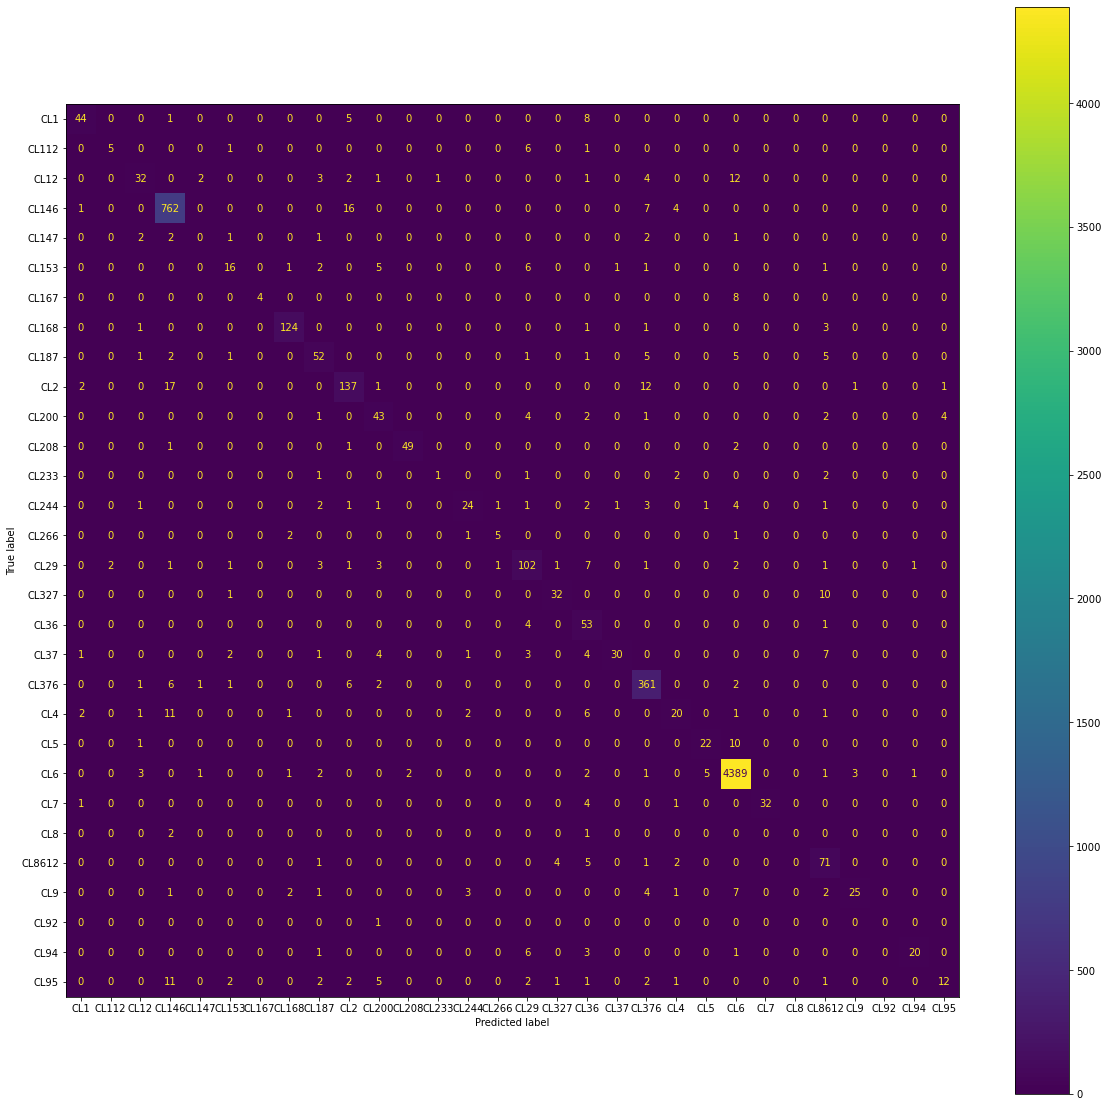

In [81]:
fig, ax = plt.subplots(figsize=(20, 20))
ConfusionMatrixDisplay.from_estimator(svm_gscv, X_test, y_test,ax=ax)
plt.show()

In [82]:
y_pred_train = svm_gscv.predict(X_train)
accuracy_score(y_train,y_pred_train)

0.9981549815498155

In [83]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         CL1       1.00      1.00      1.00       217
       CL112       1.00      1.00      1.00        53
        CL12       0.99      0.96      0.97       223
       CL146       1.00      1.00      1.00      3330
       CL147       1.00      0.94      0.97        36
       CL153       0.99      1.00      0.99        92
       CL167       1.00      0.83      0.91        29
       CL168       1.00      1.00      1.00       463
       CL187       1.00      0.97      0.98       410
         CL2       1.00      0.99      0.99       732
       CL200       1.00      1.00      1.00       252
       CL208       1.00      0.98      0.99       258
       CL233       1.00      0.94      0.97        16
       CL244       1.00      1.00      1.00       200
       CL266       1.00      1.00      1.00        42
        CL29       1.00      1.00      1.00       519
       CL327       1.00      1.00      1.00       162
        CL36       1.00    

## weighted SVM

In [94]:
classifier = SVC(random_state=42,class_weight='balanced')
param_grid = {'C': np.array([0.1,1,10])}
svm_gscv = GridSearchCV(classifier, param_grid, cv=5)
svm_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=42),
             param_grid={'C': array([ 0.1,  1. , 10. ])})

In [95]:
svm_gscv.best_params_

{'C': 10.0}

In [96]:
y_pred = svm_gscv.predict(X_test)
accuracy_score(y_test,y_pred)

0.9266386919403848

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         CL1       0.86      0.76      0.81        58
       CL112       0.71      0.38      0.50        13
        CL12       0.46      0.62      0.53        58
       CL146       0.94      0.96      0.95       790
       CL147       0.00      0.00      0.00         9
       CL153       0.52      0.45      0.48        33
       CL167       0.40      0.33      0.36        12
       CL168       0.95      0.95      0.95       130
       CL187       0.54      0.71      0.61        73
         CL2       0.78      0.82      0.80       171
       CL200       0.62      0.74      0.67        57
       CL208       0.80      0.91      0.85        53
       CL233       0.50      0.14      0.22         7
       CL244       0.76      0.60      0.68        43
       CL266       0.71      0.56      0.63         9
        CL29       0.75      0.80      0.77       127
       CL327       0.84      0.74      0.79        43
        CL36       0.51    

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

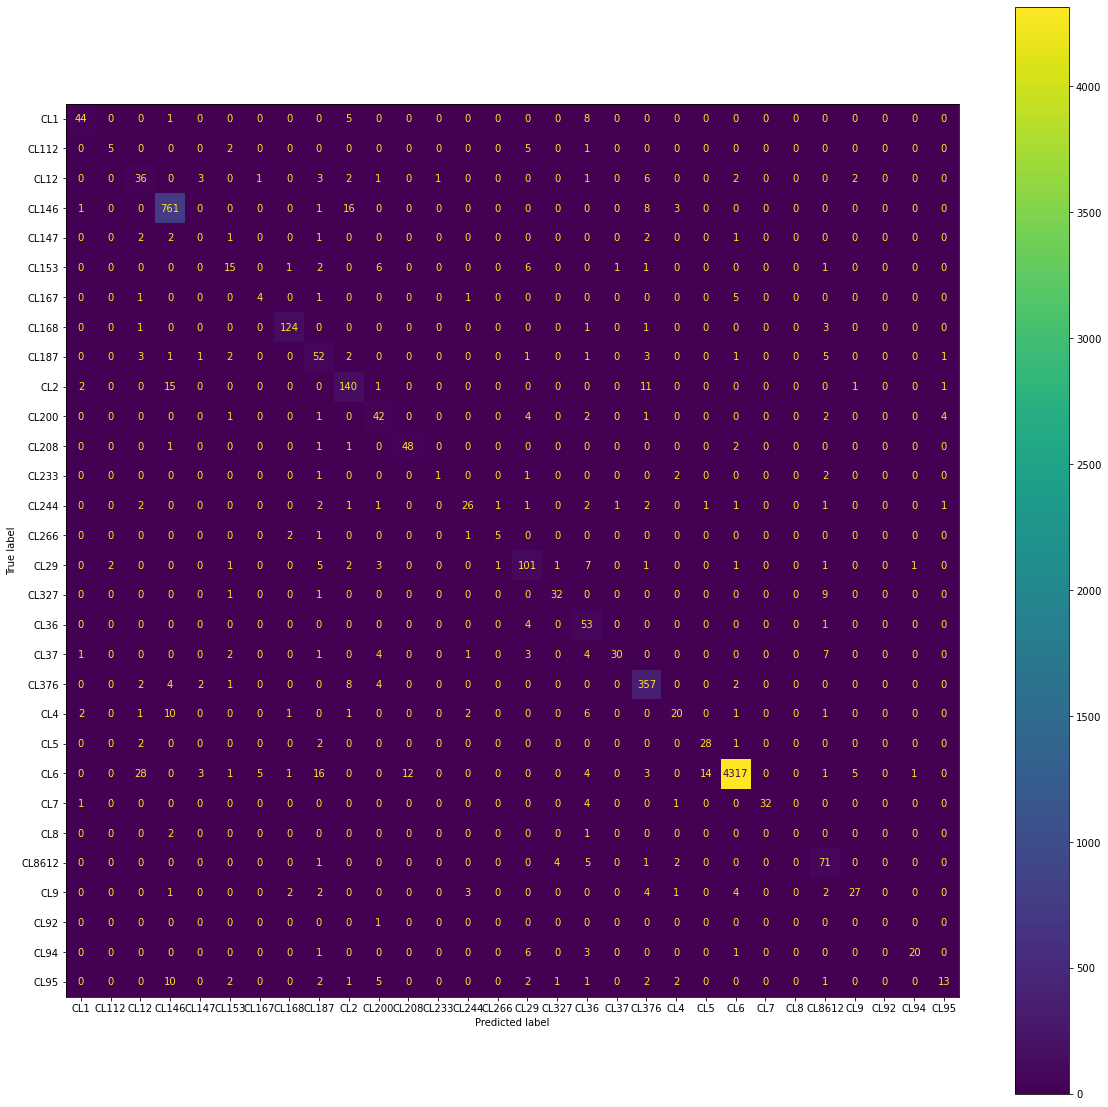

In [98]:
fig, ax = plt.subplots(figsize=(20, 20))
ConfusionMatrixDisplay.from_estimator(svm_gscv, X_test, y_test,ax=ax)
plt.show()

In [99]:
y_pred_train = svm_gscv.predict(X_train)
accuracy_score(y_train,y_pred_train)

0.9883148831488315

In [100]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         CL1       1.00      1.00      1.00       217
       CL112       1.00      1.00      1.00        53
        CL12       0.70      1.00      0.82       223
       CL146       1.00      0.99      1.00      3330
       CL147       0.86      1.00      0.92        36
       CL153       0.99      1.00      0.99        92
       CL167       0.64      1.00      0.78        29
       CL168       0.99      1.00      0.99       463
       CL187       0.91      1.00      0.95       410
         CL2       0.98      1.00      0.99       732
       CL200       1.00      1.00      1.00       252
       CL208       0.89      1.00      0.94       258
       CL233       0.94      1.00      0.97        16
       CL244       0.98      1.00      0.99       200
       CL266       0.91      1.00      0.95        42
        CL29       1.00      1.00      1.00       519
       CL327       0.98      1.00      0.99       162
        CL36       1.00    

## Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': np.array([100,300,500]),'max_depth':np.array([3,6,9]),'max_samples':np.array([0.3,0.5,0.7])}
rf_gscv = GridSearchCV(classifier, param_grid, cv=5)
rf_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': array([3, 6, 9]),
                         'max_samples': array([0.3, 0.5, 0.7]),
                         'n_estimators': array([100, 300, 500])})

In [87]:
rf_gscv.best_params_

{'max_depth': 9, 'max_samples': 0.7, 'n_estimators': 500}

In [88]:
y_pred = rf_gscv.predict(X_test)
accuracy_score(y_test,y_pred)

0.8476342063377225

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         CL1       0.95      0.64      0.76        58
       CL112       0.00      0.00      0.00        13
        CL12       0.00      0.00      0.00        58
       CL146       0.70      0.97      0.81       790
       CL147       0.00      0.00      0.00         9
       CL153       0.00      0.00      0.00        33
       CL167       0.00      0.00      0.00        12
       CL168       0.88      0.82      0.85       130
       CL187       0.00      0.00      0.00        73
         CL2       0.93      0.37      0.53       171
       CL200       0.82      0.16      0.26        57
       CL208       0.00      0.00      0.00        53
       CL233       0.00      0.00      0.00         7
       CL244       0.00      0.00      0.00        43
       CL266       0.00      0.00      0.00         9
        CL29       0.76      0.46      0.58       127
       CL327       0.73      0.26      0.38        43
        CL36       0.74    

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

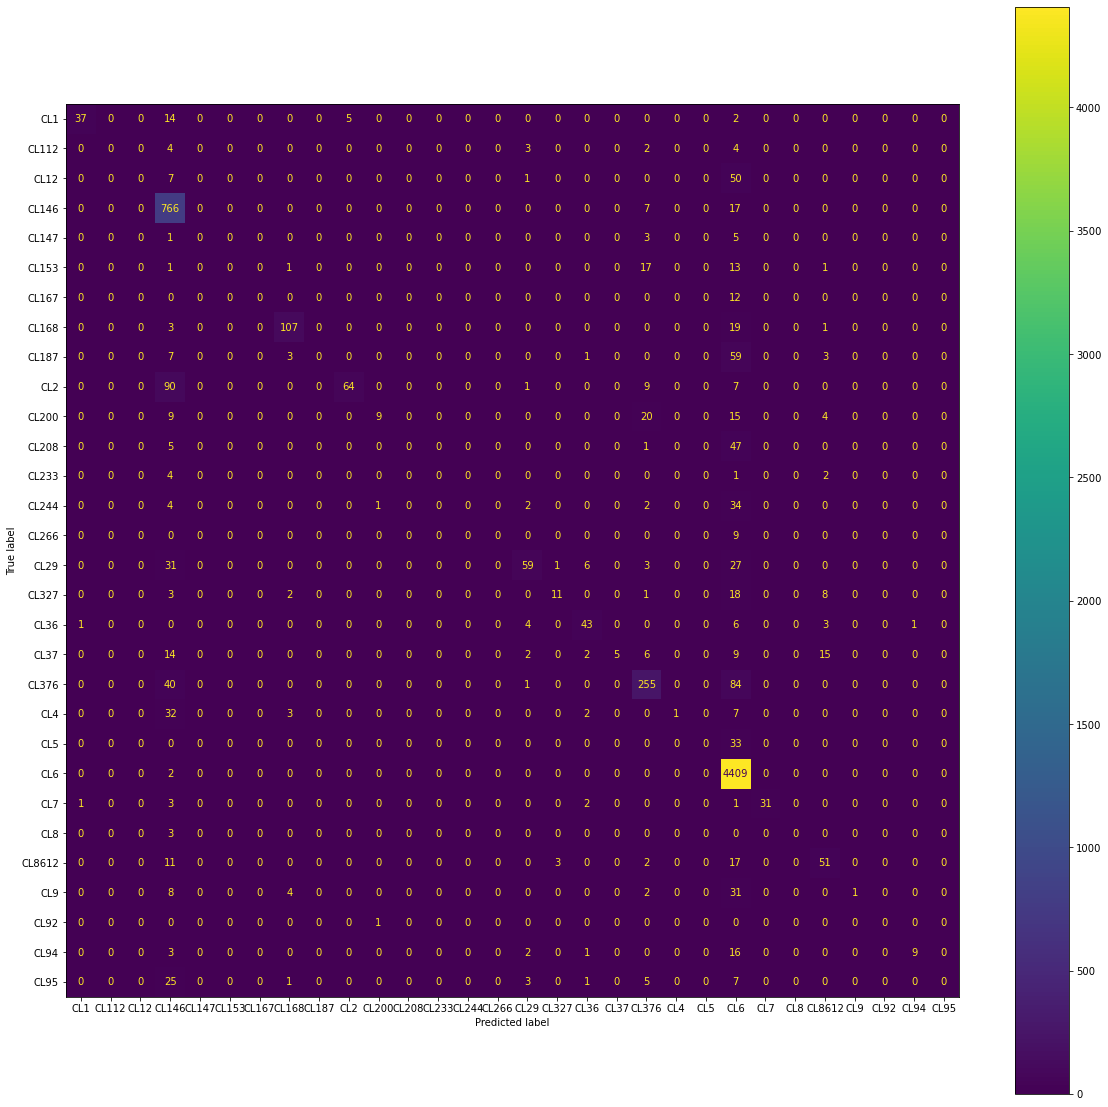

In [91]:
fig, ax = plt.subplots(figsize=(20, 20))
ConfusionMatrixDisplay.from_estimator(rf_gscv, X_test, y_test,ax=ax)
plt.show()

In [92]:
y_pred_train = rf_gscv.predict(X_train)
accuracy_score(y_train,y_pred_train)

0.8814846971999132

In [93]:
print(classification_report(y_train,y_pred_train))

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         CL1       1.00      0.86      0.92       217
       CL112       1.00      0.13      0.23        53
        CL12       1.00      0.07      0.13       223
       CL146       0.79      0.98      0.88      3330
       CL147       0.00      0.00      0.00        36
       CL153       1.00      0.01      0.02        92
       CL167       0.00      0.00      0.00        29
       CL168       0.96      0.86      0.90       463
       CL187       1.00      0.02      0.03       410
         CL2       0.98      0.56      0.71       732
       CL200       0.95      0.40      0.57       252
       CL208       0.00      0.00      0.00       258
       CL233       1.00      0.25      0.40        16
       CL244       1.00      0.18      0.31       200
       CL266       0.00      0.00      0.00        42
        CL29       0.94      0.72      0.82       519
       CL327       0.98      0.62      0.76       162
        CL36       0.99    

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Neural network

### 10 by 10 hidden layers

In [101]:
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])])
ct.fit(np.array(np.array(y).reshape(-1,1)))
y_new = ct.transform(np.array(np.array(y).reshape(-1,1))).toarray()

In [102]:
y_train_new, y_test_new = train_test_split(y_new, test_size=0.2, random_state=42)

In [103]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10,activation="relu"))
ann.add(tf.keras.layers.Dense(units=10,activation="relu"))
ann.add(tf.keras.layers.Dense(units=30,activation="softmax"))
ann.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
ann.fit(X_train,y_train_new,batch_size=32,epochs=100)

Epoch 1/100


2022-07-24 22:22:01.418303: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


864/864 [==============================] - 1s 863us/step - loss: 1.1733 - accuracy: 0.7318
Epoch 2/100
864/864 [==============================] - 1s 848us/step - loss: 0.5063 - accuracy: 0.8668
Epoch 3/100
864/864 [==============================] - 1s 848us/step - loss: 0.3899 - accuracy: 0.8909
Epoch 4/100
864/864 [==============================] - 1s 858us/step - loss: 0.3399 - accuracy: 0.9013
Epoch 5/100
864/864 [==============================] - 1s 847us/step - loss: 0.3103 - accuracy: 0.9094
Epoch 6/100
864/864 [==============================] - 1s 850us/step - loss: 0.2899 - accuracy: 0.9152
Epoch 7/100
864/864 [==============================] - 1s 847us/step - loss: 0.2755 - accuracy: 0.9184
Epoch 8/100
864/864 [==============================] - 1s 849us/step - loss: 0.2653 - accuracy: 0.9205
Epoch 9/100
864/864 [==============================] - 1s 849us/step - loss: 0.2570 - accuracy: 0.9227
Epoch 10/100
864/864 [==============================] - 1s 856us/step - loss: 0.2524 

Epoch 80/100
864/864 [==============================] - 1s 859us/step - loss: 0.1896 - accuracy: 0.9417
Epoch 81/100
864/864 [==============================] - 1s 864us/step - loss: 0.1889 - accuracy: 0.9416
Epoch 82/100
864/864 [==============================] - 1s 864us/step - loss: 0.1898 - accuracy: 0.9413
Epoch 83/100
864/864 [==============================] - 1s 865us/step - loss: 0.1901 - accuracy: 0.9416
Epoch 84/100
864/864 [==============================] - 1s 865us/step - loss: 0.1894 - accuracy: 0.9417
Epoch 85/100
864/864 [==============================] - 1s 862us/step - loss: 0.1895 - accuracy: 0.9414
Epoch 86/100
864/864 [==============================] - 1s 863us/step - loss: 0.1897 - accuracy: 0.9414
Epoch 87/100
864/864 [==============================] - 1s 862us/step - loss: 0.1891 - accuracy: 0.9418
Epoch 88/100
864/864 [==============================] - 1s 861us/step - loss: 0.1878 - accuracy: 0.9420
Epoch 89/100
864/864 [==============================] - 1s 867us

In [104]:
y_pred=ann.predict(X_test)

216/216 [==============================] - 0s 536us/step


In [105]:
y_pred = y_pred.argmax(axis=1)
y_test_new = y_test_new.argmax(axis=1)
class_name = ct.transformers_[0][1].categories_[0]
y_pred = [class_name[i] for i in y_pred]
y_test_new = [class_name[i] for i in y_test_new]

In [106]:
accuracy_score(y_test_new,y_pred)

0.9101432498914773

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         CL1       0.68      0.78      0.73        58
       CL112       0.26      0.38      0.31        13
        CL12       0.35      0.16      0.21        58
       CL146       0.92      0.95      0.94       790
       CL147       0.00      0.00      0.00         9
       CL153       0.50      0.27      0.35        33
       CL167       0.00      0.00      0.00        12
       CL168       0.92      0.94      0.93       130
       CL187       0.47      0.53      0.50        73
         CL2       0.82      0.82      0.82       171
       CL200       0.42      0.68      0.52        57
       CL208       0.81      0.81      0.81        53
       CL233       0.00      0.00      0.00         7
       CL244       0.44      0.47      0.45        43
       CL266       0.20      0.11      0.14         9
        CL29       0.72      0.67      0.69       127
       CL327       0.62      0.72      0.67        43
        CL36       0.62    

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [108]:
y_pred_train = ann.predict(X_train)
y_pred_train = y_pred_train.argmax(axis=1)
y_train_new = y_train_new.argmax(axis=1)
y_pred_train = [class_name[i] for i in y_pred_train]
y_train_new = [class_name[i] for i in y_train_new]
accuracy_score(y_train_new,y_pred_train)

864/864 [==============================] - 0s 499us/step


0.9459156356269445

In [109]:
print(classification_report(y_train_new,y_pred_train))

              precision    recall  f1-score   support

         CL1       0.91      0.91      0.91       217
       CL112       0.58      0.66      0.62        53
        CL12       0.58      0.40      0.47       223
       CL146       0.96      0.98      0.97      3330
       CL147       0.00      0.00      0.00        36
       CL153       0.53      0.50      0.52        92
       CL167       0.00      0.00      0.00        29
       CL168       0.98      0.98      0.98       463
       CL187       0.66      0.65      0.66       410
         CL2       0.88      0.88      0.88       732
       CL200       0.63      0.70      0.66       252
       CL208       0.96      0.93      0.94       258
       CL233       0.00      0.00      0.00        16
       CL244       0.70      0.67      0.68       200
       CL266       0.43      0.21      0.29        42
        CL29       0.85      0.81      0.83       519
       CL327       0.74      0.88      0.80       162
        CL36       0.76    

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

### 6 by 10 by 10 hidden layers

In [110]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])])
ct.fit(np.array(np.array(y).reshape(-1,1)))
y_new = ct.transform(np.array(np.array(y).reshape(-1,1))).toarray()
y_train_new, y_test_new = train_test_split(y_new, test_size=0.2, random_state=42)

In [111]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=30,activation="softmax"))
ann.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
ann.fit(X_train,y_train_new,batch_size=32,epochs=100)

Epoch 1/100
864/864 [==============================] - 1s 799us/step - loss: 1.7202 - accuracy: 0.6050
Epoch 2/100
864/864 [==============================] - 1s 798us/step - loss: 0.7248 - accuracy: 0.7951
Epoch 3/100
864/864 [==============================] - 1s 795us/step - loss: 0.6384 - accuracy: 0.8256
Epoch 4/100
864/864 [==============================] - 1s 811us/step - loss: 0.5760 - accuracy: 0.8453
Epoch 5/100
864/864 [==============================] - 1s 801us/step - loss: 0.5342 - accuracy: 0.8575
Epoch 6/100
864/864 [==============================] - 1s 827us/step - loss: 0.5054 - accuracy: 0.8599
Epoch 7/100
864/864 [==============================] - 1s 803us/step - loss: 0.4774 - accuracy: 0.8640
Epoch 8/100
864/864 [==============================] - 1s 806us/step - loss: 0.4562 - accuracy: 0.8676
Epoch 9/100
864/864 [==============================] - 1s 809us/step - loss: 0.4395 - accuracy: 0.8712
Epoch 10/100
864/864 [==============================] - 1s 801us/step - l

864/864 [==============================] - 1s 831us/step - loss: 0.3155 - accuracy: 0.9050
Epoch 80/100
864/864 [==============================] - 1s 825us/step - loss: 0.3139 - accuracy: 0.9070
Epoch 81/100
864/864 [==============================] - 1s 826us/step - loss: 0.3151 - accuracy: 0.9058
Epoch 82/100
864/864 [==============================] - 1s 828us/step - loss: 0.3129 - accuracy: 0.9069
Epoch 83/100
864/864 [==============================] - 1s 829us/step - loss: 0.3118 - accuracy: 0.9066
Epoch 84/100
864/864 [==============================] - 1s 825us/step - loss: 0.3142 - accuracy: 0.9063
Epoch 85/100
864/864 [==============================] - 1s 825us/step - loss: 0.3115 - accuracy: 0.9068
Epoch 86/100
864/864 [==============================] - 1s 829us/step - loss: 0.3119 - accuracy: 0.9062
Epoch 87/100
864/864 [==============================] - 1s 841us/step - loss: 0.3117 - accuracy: 0.9072
Epoch 88/100
864/864 [==============================] - 1s 829us/step - loss:

In [112]:
y_pred=ann.predict(X_test)
y_pred = y_pred.argmax(axis=1)
y_test_new = y_test_new.argmax(axis=1)
class_name = ct.transformers_[0][1].categories_[0]
y_pred = [class_name[i] for i in y_pred]
y_test_new = [class_name[i] for i in y_test_new]

216/216 [==============================] - 0s 531us/step


In [113]:
accuracy_score(y_test_new,y_pred)

0.894950079583273

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         CL1       0.64      0.50      0.56        58
       CL112       0.20      0.08      0.11        13
        CL12       0.20      0.12      0.15        58
       CL146       0.90      0.96      0.93       790
       CL147       0.00      0.00      0.00         9
       CL153       0.00      0.00      0.00        33
       CL167       0.00      0.00      0.00        12
       CL168       0.87      0.91      0.89       130
       CL187       0.37      0.36      0.36        73
         CL2       0.70      0.78      0.74       171
       CL200       0.43      0.65      0.52        57
       CL208       0.68      0.94      0.79        53
       CL233       0.00      0.00      0.00         7
       CL244       0.18      0.07      0.10        43
       CL266       0.00      0.00      0.00         9
        CL29       0.62      0.77      0.69       127
       CL327       1.00      0.02      0.05        43
        CL36       0.65    

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [115]:
y_pred_train = ann.predict(X_train)
y_pred_train = y_pred_train.argmax(axis=1)
y_train_new = y_train_new.argmax(axis=1)
y_pred_train = [class_name[i] for i in y_pred_train]
y_train_new = [class_name[i] for i in y_train_new]
accuracy_score(y_train_new,y_pred_train)

864/864 [==============================] - 0s 518us/step


0.9107155777440127

In [116]:
print(classification_report(y_train_new,y_pred_train))

              precision    recall  f1-score   support

         CL1       0.72      0.65      0.68       217
       CL112       0.00      0.00      0.00        53
        CL12       0.36      0.23      0.28       223
       CL146       0.93      0.98      0.95      3330
       CL147       0.00      0.00      0.00        36
       CL153       0.00      0.00      0.00        92
       CL167       0.00      0.00      0.00        29
       CL168       0.92      0.98      0.95       463
       CL187       0.43      0.35      0.38       410
         CL2       0.78      0.84      0.81       732
       CL200       0.50      0.66      0.57       252
       CL208       0.76      0.93      0.83       258
       CL233       0.00      0.00      0.00        16
       CL244       0.34      0.15      0.21       200
       CL266       0.00      0.00      0.00        42
        CL29       0.68      0.76      0.72       519
       CL327       0.12      0.01      0.01       162
        CL36       0.61    

/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yushanyang/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le